In [2]:
from pylab import *
from matplotlib import *
from uncertainties import * 
from uncertainties import unumpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import math

Step 1: The measurement of I and V at room temperature is uploaded. By uploading the data, it is assumed that all of the measurement are taken correctly.
Step 2: Then, the measurement of I and V at a temperature of -100C is conducted, and the measurement that repeats step 1 in this circumstances is taken and uploaded
Step 3: The dataset for -70C, -40C and -10C are uploaded

From the measurement, it is known that V2 has got a high sensibility, which uncertainty can take to be +- 10%

In [3]:
"""Load Files"""
R = 50000;
R = ufloat(50000,0.01*R)
N100 = np.load("N100.npy")
N70 = np.load("N70.npy")
N40 = np.load("N40.npy")
N10 = np.load("N10.npy")
P25 = np.load("P25.npy")
Dataset = np.array([N100,N70,N40,N10,P25])
DataTemp = np.array([-100,-70,-40,-10,25])
DataTempE = np.array([4,4,4,4,4])
DataTemp = unumpy.uarray(DataTemp,DataTempE)

Step 4: By using the following code, this completes one loop of the data acquicision.

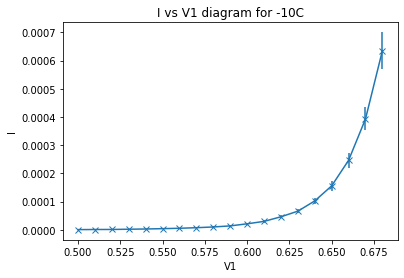

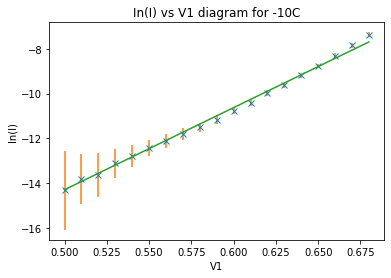

In [4]:
#One plotting sequence

#Calculation of current, including error propagation
V2 = unumpy.uarray(N10[:,1],N10[:,1]*0.1);
V1n = N10[:,0];
V1e = np.repeat(0.001,len(V1n))
V1 = unumpy.uarray(V1n,V1e); 
R = 50000;
R = ufloat(50000,0.01*R)
Vn10 = V2 - V1
In10 = Vn10/R;

LnIn10 = unumpy.log(In10)

#Plot in normal scale
plt.errorbar(N10[:,0], unumpy.nominal_values(In10), unumpy.std_devs(In10), marker = 'x')
pyplot.title('I vs V1 diagram for -10C')
pyplot.xlabel('V1')
pyplot.ylabel('I')
plt.show()
#Plot in natural log scale, together with fitting line of the best fit
p,cov = polyfit(N10[:,0],unumpy.nominal_values(LnIn10),1,w=unumpy.std_devs(LnIn10),cov=True)
lnItheo = p[0]*N10[:,0] + p[1];
plt.plot(N10[:,0], unumpy.nominal_values(LnIn10),'x')
plt.errorbar(N10[:,0], unumpy.nominal_values(LnIn10), unumpy.std_devs(LnIn10), fmt='none',marker = 'x')
plt.plot(N10[:,0], lnItheo)
pyplot.title('In(I) vs V1 diagram for -10C')
pyplot.xlabel('V1')
pyplot.ylabel('In(I)')
plt.show()

The final data acquicision is then finished by using the following code

In [5]:
print(len(Dataset))

5


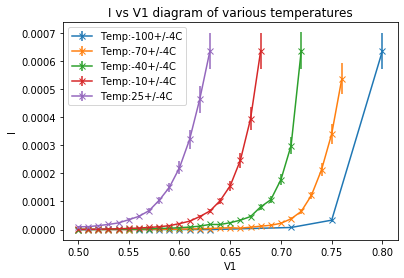

In [6]:
"""Dataset = np.array([N100,N70,N40,N10,P25])
DataTemp = np.array([-100,-70,-40,-10,25])
DataTempE = np.array([4,4,4,4,4])
DataTemp = unumpy.uarray(DataTemp,DataTempE)"""
Num = len(Dataset)
fig, ax = plt.subplots()
i = 0;
for Data in Dataset:
    Vd = Data[:,1] - Data[:,0];
    ErrorV = Data[:,1]*0.1 #The error of V1 can set to be zero 
    Vd = unumpy.uarray(Vd,ErrorV)
    I = Vd/R;
    name = "Temp:" + str(DataTemp[i]) + "C"
    plt.errorbar(Data[:,0], unumpy.nominal_values(I), unumpy.std_devs(I), marker = 'x', label = name);
    i = i + 1
leg = ax.legend();
pyplot.title('I vs V1 diagram of various temperatures')
pyplot.xlabel('V1')
pyplot.ylabel('I')
plt.show()

    However, due to the zero voltage of -100C and -70C, the current will start with an array of I = 0 which will make log(I) undefined. Thus, to fix this, the data that has got I = 0 has been removed from the data analysis. Since the approximated form of the equation is only applicable at a V>= 0.1V, therefore the data that has got V < 0.1V is temporarily removed from the analysis. For those data which has got too few datapoints (such as T = -100C), a non-linear fitting method is conducted.

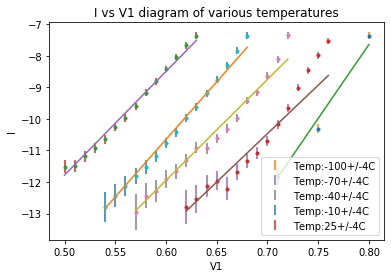

[[46.80851556541192+/-5.893199471589424
  -45.09220557218853+/-4.277965873294411]
 [30.632756042658034+/-2.5337383039757686
  -31.909114902411762+/-1.6473261520276363]
 [31.960603307852004+/-1.0162202357215226
  -31.12293020404673+/-0.6094216142373619]
 [36.429479411950275+/-0.7404157048644742
  -32.506966837419434+/-0.42144574474551455]
 [32.81637986068146+/-1.0567998763290194
  -28.187718564578294+/-0.5781977085653761]]


In [7]:
#LOOP version
Dataset = np.array([N100,N70,N40,N10,P25])
DataTemp = np.array([-100,-70,-40,-10,25])
DataTempE = np.array([4,4,4,4,4])
DataTemp = unumpy.uarray(DataTemp,DataTempE)
Num = len(Dataset)
fig, ax = plt.subplots()
i = 0;
plist = []
for Data in Dataset:
    Vd = Data[:,1] - Data[:,0];
    ErrorV = Data[:,1]*0.1 #The error of V1 can set to be zero 
    Vd = unumpy.uarray(Vd,ErrorV)
    ApproxGood = np.where(Vd > 0.1)
    Vd = Vd[ApproxGood]
    I = Vd/R;
    LnI = unumpy.log(I)
    name = "Temp:" + str(DataTemp[i]) + "C"
    plt.plot(Data[:,0][ApproxGood], unumpy.nominal_values(LnI), '.')
    plt.errorbar(Data[:,0][ApproxGood], unumpy.nominal_values(LnI), unumpy.std_devs(LnI), fmt = 'none', label = name);
    p,cov = polyfit(Data[:,0][ApproxGood],unumpy.nominal_values(LnI),1,w=unumpy.std_devs(LnI),cov=True)
    lnItheo = p[0]*Data[:,0][ApproxGood] + p[1];
    plt.plot(Data[:,0][ApproxGood], lnItheo)
    error = sqrt(np.diagonal(cov));
    p = unumpy.uarray(p,error)
    plist.append(p)
    i = i + 1
leg = ax.legend();
pyplot.title('I vs V1 diagram of various temperatures')
pyplot.xlabel('V1')
pyplot.ylabel('I')
plt.show()

plist = np.asarray(plist)
print(plist)

From above, it is obvious that some of the linear fit is not fitting well, which it is decided then to fit them separately by non-linear fitting method to get an appropriate result.

[-1.110520868952938+/-0.10830855892631906
 -3.3097513836585613+/-4.615321162888029]
The bandcap energy is
-1.11+/-0.11


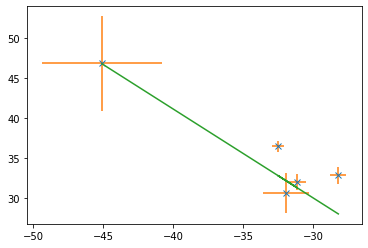

In [8]:
"""unumpy.nominal_values(LnI)
unumpy.std_devs(LnI)"""
fig, ax = plt.subplots()
plt.plot(unumpy.nominal_values(plist[:,1]),unumpy.nominal_values(plist[:,0]),'x');
plt.errorbar(unumpy.nominal_values(plist[:,1]), unumpy.nominal_values(plist[:,0]), xerr = unumpy.std_devs(plist[:,1]),yerr = unumpy.std_devs(plist[:,0]), fmt = 'none');
p,cov = polyfit(unumpy.nominal_values(plist[:,1]),unumpy.nominal_values(plist[:,0]),1,w=unumpy.std_devs(plist[:,0]),cov=True);
theo = p[0]*unumpy.nominal_values(plist[:,1]) + p[1];
plt.plot(unumpy.nominal_values(plist[:,1]), theo)
error = sqrt(np.diagonal(cov));
p = unumpy.uarray(p,error);
print(p)
print("The bandcap energy is")
print(p[0])

2.1314738856782224e+20
2.6103812610378302e-20
2.1314738856782224e+20
2.6103812610378302e-20


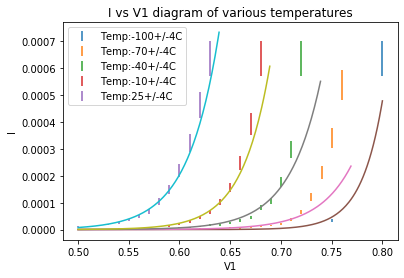

In [9]:
"""Dataset = np.array([N100,N70,N40,N10,P25])
DataTemp = np.array([-100,-70,-40,-10,25])
DataTempE = np.array([4,4,4,4,4])
DataTemp = unumpy.uarray(DataTemp,DataTempE)"""
Num = len(Dataset)
fig, ax = plt.subplots()
i = 0;
for Data in Dataset:
    Vd = Data[:,1] - Data[:,0];
    ErrorV = Data[:,1]*0.1 #The error of V1 can set to be zero 
    Vd = unumpy.uarray(Vd,ErrorV)
    I = Vd/R;
    name = "Temp:" + str(DataTemp[i]) + "C"
    plt.errorbar(Data[:,0], unumpy.nominal_values(I), unumpy.std_devs(I), marker = 'x', label = name, fmt = 'none');
    i = i + 1

x = np.arange(0.5,0.8,0.001)
I = exp(unumpy.nominal_values(plist[0][0])*x+ unumpy.nominal_values(plist[0][1]));
print(exp(unumpy.nominal_values(plist[0][0])))
print(exp(unumpy.nominal_values(plist[0][1])))
plt.plot(x, I)

x = np.arange(0.5,0.77,0.001)
I = exp(unumpy.nominal_values(plist[1][0])*x+ unumpy.nominal_values(plist[1][1]));
print(exp(unumpy.nominal_values(plist[0][0])))
print(exp(unumpy.nominal_values(plist[0][1])))
plt.plot(x, I)

x = np.arange(0.5,0.74,0.001)
I = exp(unumpy.nominal_values(plist[2][0])*x+ unumpy.nominal_values(plist[2][1]));
plt.plot(x, I)

x = np.arange(0.5,0.69,0.001)
I = exp(unumpy.nominal_values(plist[3][0])*x+ unumpy.nominal_values(plist[3][1]));
plt.plot(x, I)

x = np.arange(0.5,0.64,0.001)
I = exp(unumpy.nominal_values(plist[4][0])*x+ unumpy.nominal_values(plist[4][1]));
plt.plot(x, I)

leg = ax.legend();
pyplot.title('I vs V1 diagram of various temperatures')
pyplot.xlabel('V1')
pyplot.ylabel('I')
plt.show()

2.1314738856782224e+20
2.6103812610378302e-20


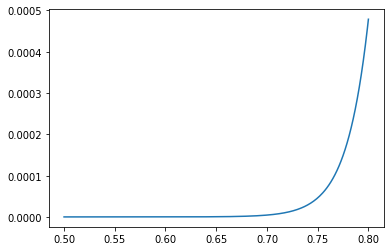

In [10]:
x = np.arange(0.5,0.8,0.001)
I = exp(unumpy.nominal_values(plist[0][0])*x+ unumpy.nominal_values(plist[0][1]));
print(exp(unumpy.nominal_values(plist[0][0])))
print(exp(unumpy.nominal_values(plist[0][1])))
plt.plot(x, I)

Refit -100,-70,-40C by using non-linear curve fit.

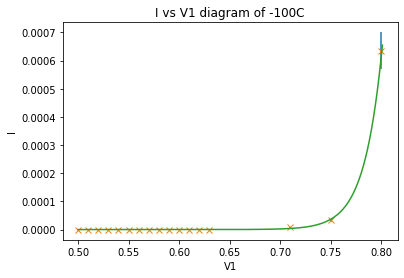

[1.49868121e-23 3.31056463e+24]
[1.74723881e-23 4.94864814e+24]
[-52.55487161177517+/-1.165850880293466]
[56.45916099010476+/-1.4948048724302259]


In [11]:
#Non-lienar bulk fit
def myfitfn(V,Is,A):
    return Is*(A**(V)-1);

lnIs = [];
qnkT = [];

#Fit -100
Data = N100;

#Current calculation and its error propagation
R = 50000;
R = ufloat(50000,0.01*R)
V2 = unumpy.uarray(Data[:,1],Data[:,1]*0.1);
V1n = Data[:,0];
V1e = np.repeat(0.001,len(V1n))
V1 = unumpy.uarray(V1n,V1e); 
Vd = V2 - V1
I = Vd/R;

#Plotting experimental data
plt.errorbar(Data[:,0], unumpy.nominal_values(I), unumpy.std_devs(I), marker = 'x', fmt = 'none', label = name);
plt.plot(Data[:,0],unumpy.nominal_values(I),'x')

#Plotting initial guess for non-linear fitting
A = 2.1314738856782224e+20;
Is = 2.6103812610378302e-20;
Vtheo = np.arange(0.5,0.801,0.001)
Itheog = Is*(A**(Vtheo)-1);
#plt.plot(Vtheo, Itheog)
pguess = [Is,A];
#print(pguess)

#Non-linear fitting
p,cov = curve_fit(myfitfn,Data[:,0],unumpy.nominal_values(I),sigma = unumpy.std_devs(I),p0=[Is,A]);

#Plotting fitted curve
Itheo = p[0]*(p[1]**(Vtheo)-1);
plt.plot(Vtheo, Itheo)
pyplot.title('I vs V1 diagram of -100C')
pyplot.xlabel('V1')
pyplot.ylabel('I')
plt.show()

#Step 5: Getting error of each parameter
error = sqrt(np.diagonal(cov))
print(p)
print(error)

Is= ufloat(p[0],error[0]);
expqnkT = ufloat(p[1],error[1]);

#Step 5: Record the getted ln(Is) and q/nkT to the array for plotting and Eg0 calculation
lnIselement = unumpy.log(Is);
qnkTelement = unumpy.log(expqnkT);

lnIs.append(ufloat(unumpy.nominal_values(lnIselement),unumpy.std_devs(lnIselement)))
qnkT.append(ufloat(unumpy.nominal_values(qnkTelement),unumpy.std_devs(qnkTelement)))

print(lnIs)
print(qnkT)

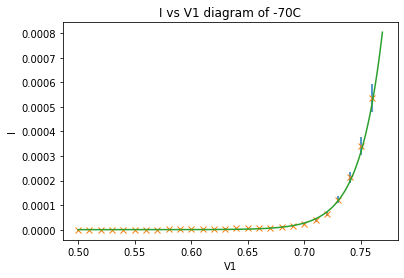

[3.21662499e-20 2.10548178e+21]
[3.91192254e-20 3.52208813e+21]
[-52.55487161177517+/-1.165850880293466, -44.88336918909627+/-1.2161574780576732]
[56.45916099010476+/-1.4948048724302259, 49.09883126804802+/-1.6728181461541567]


In [12]:
#Fit -70
Data = N70;
V2 = unumpy.uarray(Data[:,1],Data[:,1]*0.1);
V1n = Data[:,0];
V1e = np.repeat(0.001,len(V1n))
V1 = unumpy.uarray(V1n,V1e); 
Vd = V2 - V1
I = Vd/R;
plt.errorbar(Data[:,0], unumpy.nominal_values(I), unumpy.std_devs(I), marker = 'x', fmt = 'none', label = name);
plt.plot(Data[:,0],unumpy.nominal_values(I),'x')

A = 2.1314738856782224e+20;
Is = 2.6103812610378302e-20;
Vtheo = np.arange(0.5,0.77,0.001)
Itheog = Is*(A**(Vtheo)-1);
#plt.plot(Vtheo, Itheog)
pguess = [Is,A];

p,cov = curve_fit(myfitfn,Data[:,0],unumpy.nominal_values(I),sigma = unumpy.std_devs(I),p0=[Is,A]);
Itheo = p[0]*(p[1]**(Vtheo)-1);
plt.plot(Vtheo, Itheo)
pyplot.title('I vs V1 diagram of -70C')
pyplot.xlabel('V1')
pyplot.ylabel('I')
plt.show()
error = sqrt(np.diagonal(cov))
print(p)
print(error)

Is= ufloat(p[0],error[0]);
expqnkT = ufloat(p[1],error[1]);

lnIselement = unumpy.log(Is);
qnkTelement = unumpy.log(expqnkT);

lnIs.append(ufloat(unumpy.nominal_values(lnIselement),unumpy.std_devs(lnIselement)))
qnkT.append(ufloat(unumpy.nominal_values(qnkTelement),unumpy.std_devs(qnkTelement)))

print(lnIs)
print(qnkT)

In [13]:
T = -100+273.15;
q = 1.602e-19;
k = 1.38064852e-23;
print((q/(k*T))/log(p[1]));

1.364852531871284


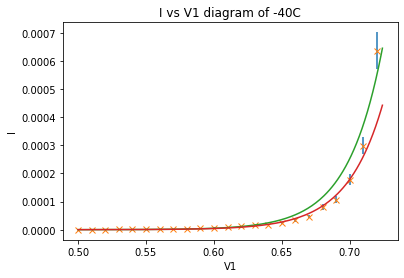

[6.54253607e-16 2.18559157e+16]
[8.21246514e-16 4.05112668e+16]
[-52.55487161177517+/-1.165850880293466, -44.88336918909627+/-1.2161574780576732]
[56.45916099010476+/-1.4948048724302259, 49.09883126804802+/-1.6728181461541567]


In [14]:
#Fit -40
Data = N40;
V2 = unumpy.uarray(Data[:,1],Data[:,1]*0.1);
V1n = Data[:,0];
V1e = np.repeat(0.001,len(V1n))
V1 = unumpy.uarray(V1n,V1e); 
Vd = V2 - V1
I = Vd/R;
plt.errorbar(Data[:,0], unumpy.nominal_values(I), unumpy.std_devs(I), marker = 'x', fmt = 'none', label = name);
plt.plot(Data[:,0],unumpy.nominal_values(I),'x')

A =  8.58526237e+16;
Is = 3.54321776e-16;
Vtheo = np.arange(0.5,0.725,0.001)
Itheog = Is*(A**(Vtheo)-1);
plt.plot(Vtheo, Itheog)
pguess = [Is,A];

p,cov = curve_fit(myfitfn,Data[:,0],unumpy.nominal_values(I),sigma = unumpy.std_devs(I),p0=[Is,A]);
Itheo = p[0]*(p[1]**(Vtheo)-1);
plt.plot(Vtheo, Itheo)
pyplot.title('I vs V1 diagram of -40C')
pyplot.xlabel('V1')
pyplot.ylabel('I')
plt.show()
error = sqrt(np.diagonal(cov))
print(p)
print(error)

Is= ufloat(p[0],error[0]);
expqnkT = ufloat(p[1],error[1]);

#Is= ufloat(Is,error[0]);
#expqnkT = ufloat(A,error[1]);

lnIselement = unumpy.log(Is);
qnkTelement = unumpy.log(expqnkT);

#lnIs.append(ufloat(unumpy.nominal_values(lnIselement),unumpy.std_devs(lnIselement)))
#qnkT.append(ufloat(unumpy.nominal_values(qnkTelement),unumpy.std_devs(qnkTelement)))

print(lnIs)
print(qnkT)

In [15]:
T = 25+273.15;
q = 1.602e-19;
k = 1.38064852e-23;
print((q/(k*T))/log(p[1]));

1.0343994496524562


[4.52753806e-16, 6.87989193e+17]


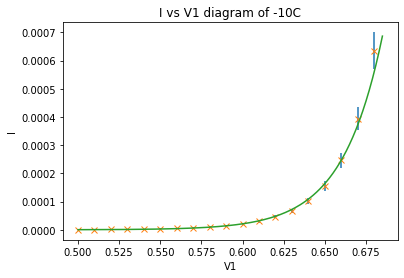

[4.52683746e-16 6.06134762e+17]
[2.10965839e-16 4.42761174e+17]
[-52.55487161177517+/-1.165850880293466, -44.88336918909627+/-1.2161574780576732, -35.33133792557879+/-0.4660336071547089]
[56.45916099010476+/-1.4948048724302259, 49.09883126804802+/-1.6728181461541567, 40.94587873650836+/-0.7304665589104422]


In [16]:
#Fit -10
Data = N10;
V2 = unumpy.uarray(Data[:,1],Data[:,1]*0.1);
V1n = Data[:,0];
V1e = np.repeat(0.001,len(V1n))
V1 = unumpy.uarray(V1n,V1e); 
Vd = V2 - V1
I = Vd/R;
plt.errorbar(Data[:,0], unumpy.nominal_values(I), unumpy.std_devs(I), marker = 'x', fmt = 'none', label = name);
plt.plot(Data[:,0],unumpy.nominal_values(I),'x')

A = 6.87989193e+17;
Is = 4.52753806e-16;
Vtheo = np.arange(0.5,0.685,0.001)
Itheog = Is*(A**(Vtheo)-1);
#plt.plot(Vtheo, Itheog)
pguess = [Is,A];
print(pguess)

p,cov = curve_fit(myfitfn,Data[:,0],unumpy.nominal_values(I),sigma = unumpy.std_devs(I),p0=[Is,A]);
Itheo = p[0]*(p[1]**(Vtheo)-1);
plt.plot(Vtheo, Itheo)
pyplot.title('I vs V1 diagram of -10C')
pyplot.xlabel('V1')
pyplot.ylabel('I')
plt.show()
error = sqrt(np.diagonal(cov))
print(p)
print(error)

Is= ufloat(p[0],error[0]);
expqnkT = ufloat(p[1],error[1]);

lnIselement = unumpy.log(Is);
qnkTelement = unumpy.log(expqnkT);

lnIs.append(ufloat(unumpy.nominal_values(lnIselement),unumpy.std_devs(lnIselement)))
qnkT.append(ufloat(unumpy.nominal_values(qnkTelement),unumpy.std_devs(qnkTelement)))

print(lnIs)
print(qnkT)

In [17]:
T = 25+273.15;
q = 1.602e-19;
k = 1.38064852e-23;
print((q/(k*T))/log(p[1]));

0.9504611514044241


[4.52753806e-16, 6.87989193e+17]


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


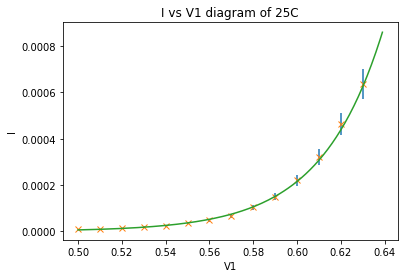

[1.20512538e-13 2.63207042e+15]
[5.28863478e-14 1.98489307e+15]
[-52.55487161177517+/-1.165850880293466, -44.88336918909627+/-1.2161574780576732, -35.33133792557879+/-0.4660336071547089, -29.747022596395855+/-0.4388451906112011]
[56.45916099010476+/-1.4948048724302259, 49.09883126804802+/-1.6728181461541567, 40.94587873650836+/-0.7304665589104422, 35.50654716466422+/-0.754118527425591]


In [18]:
#Fit 25
Data = P25;
V2 = unumpy.uarray(Data[:,1],Data[:,1]*0.1);
V1n = Data[:,0];
V1e = np.repeat(0.001,len(V1n))
V1 = unumpy.uarray(V1n,V1e); 
Vd = V2 - V1
I = Vd/R;
plt.errorbar(Data[:,0], unumpy.nominal_values(I), unumpy.std_devs(I), marker = 'x', fmt = 'none', label = name);
plt.plot(Data[:,0],unumpy.nominal_values(I),'x')

A = 6.87989193e+17;
Is = 4.52753806e-16;
Vtheo = np.arange(0.5,0.64,0.001)
Itheog = Is*(A**(Vtheo)-1);
#plt.plot(Vtheo, Itheog)
pguess = [Is,A];
print(pguess)

p,cov = curve_fit(myfitfn,Data[:,0],unumpy.nominal_values(I),sigma = unumpy.std_devs(I),p0=[Is,A]);
Itheo = p[0]*(p[1]**(Vtheo)-1);
plt.plot(Vtheo, Itheo)
pyplot.title('I vs V1 diagram of 25C')
pyplot.xlabel('V1')
pyplot.ylabel('I')
plt.show()
error = sqrt(np.diagonal(cov))
print(p)
print(error)

Is= ufloat(p[0],error[0]);
expqnkT = ufloat(p[1],error[1]);

lnIselement = unumpy.log(Is);
qnkTelement = unumpy.log(expqnkT);

lnIs.append(ufloat(unumpy.nominal_values(lnIselement),unumpy.std_devs(lnIselement)))
qnkT.append(ufloat(unumpy.nominal_values(qnkTelement),unumpy.std_devs(qnkTelement)))

print(lnIs)
print(qnkT)

In [19]:
T = 25+273.15;
q = 1.602e-19;
k = 1.38064852e-23;
print((q/(k*T))/log(p[1]));

1.0960645333573285


The resultant plot is better

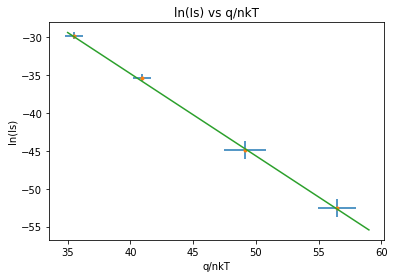

[-1.08724233  8.7046885 ]
[0.0246856  1.26320576]


In [26]:
#Convert array into numpy array
T = np.array([-100,-70,-40,-10,25])
qnkT = np.asarray(qnkT)
lnIs = np.asarray(lnIs)

#Plot the experimental data
plt.errorbar(unumpy.nominal_values(qnkT), unumpy.nominal_values(lnIs), xerr=unumpy.std_devs(qnkT), yerr=unumpy.std_devs(lnIs), marker = 'x', fmt = 'none', label = name);
plt.plot(unumpy.nominal_values(qnkT),unumpy.nominal_values(lnIs),'.')

#Line fitting
p,cov = polyfit(unumpy.nominal_values(qnkT),unumpy.nominal_values(lnIs),1,w=unumpy.std_devs(lnIs),cov=True);

#Plotting theoretical line
x = np.arange(35,60,1)
y = p[0]*x + p[1];


#Getting Eg0
plt.plot(x,y)
pyplot.title('ln(Is) vs q/nkT')
pyplot.xlabel('q/nkT')
pyplot.ylabel('ln(Is)')
plt.show()


#Error extracting
print(p)
error = sqrt(np.diagonal(cov));
print(error)

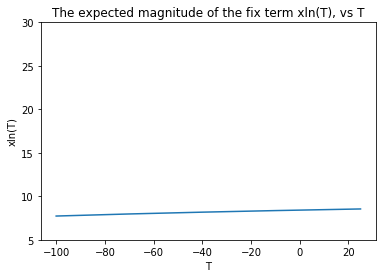

In [30]:
q = 1.602e-19;
k = 1.381e-19;

T = np.array([-100,-70,-40,-10,25])
x = 1.5;
TK = T + 273.15;
lnI = x*log(TK);
plt.plot(T,lnI)
pyplot.title('The expected magnitude of the fix term xln(T), vs T')
pyplot.xlabel('T')
pyplot.ylabel('xln(T)')
ylim(top=30)  # adjust the top leaving bottom unchanged
ylim(bottom=5)
plt.show()

[1.4986812085465664e-23+/-1.7472388062632898e-23
 3.2166249921309417e-20+/-3.911922538287249e-20
 4.526837455877283e-16+/-2.1096583885655355e-16
 1.2051253814514457e-13+/-5.288634777334561e-14]


AssertionError: 

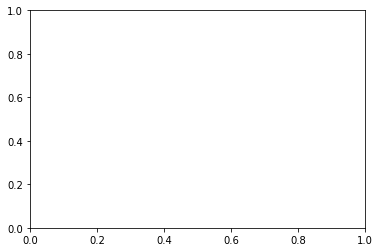

In [22]:
T = np.array([-100,-70,-40,-10,25])
Te = np.array([4,4,4,4,4])
T = T + 273.15;
T = unumpy.uarray(T,Te)
x = unumpy.log(T);
Is = unumpy.exp(lnIs)
print(Is)

plt.errorbar(unumpy.nominal_values(x), unumpy.nominal_values(lnIs), xerr=unumpy.std_devs(x), yerr=unumpy.std_devs(lnIs), marker = 'x', fmt = 'none', label = name);
plt.plot(unumpy.nominal_values(x),unumpy.nominal_values(lnIs),'.')
p,cov = polyfit(unumpy.nominal_values(x),unumpy.nominal_values(lnIs),1,w=unumpy.std_devs(lnIs),cov=True);
x = np.arange(5,6,0.1)
print(x)
y = p[0]*x + p[1];
print(p)
plt.plot(x,y)
error = sqrt(np.diagonal(cov));
print(error)

[1.4986812085465664e-23+/-1.7472388062632898e-23
 3.2166249921309417e-20+/-3.911922538287249e-20
 4.526837455877283e-16+/-2.1096583885655355e-16
 1.2051253814514457e-13+/-5.288634777334561e-14]


AssertionError: 

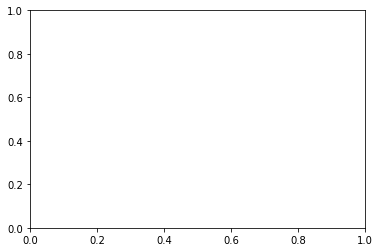

In [23]:
T = np.array([-100,-70,-40,-10,25])
Te = np.array([4,4,4,4,4])
T = T + 273.15;
T = unumpy.uarray(T,Te)
x = unumpy.log(T);
Is = unumpy.exp(lnIs)
print(Is)

plt.errorbar(unumpy.nominal_values(x), unumpy.nominal_values(lnIs), xerr=unumpy.std_devs(x), yerr=unumpy.std_devs(lnIs), marker = 'x', fmt = 'none', label = name);
plt.plot(unumpy.nominal_values(x),unumpy.nominal_values(lnIs),'.')
p,cov = polyfit(unumpy.nominal_values(x),unumpy.nominal_values(lnIs),1,w=unumpy.std_devs(lnIs),cov=True);
x = np.arange(5,6,0.1)
print(x)
y = p[0]*x + p[1];
print(p)
plt.plot(x,y)
error = sqrt(np.diagonal(cov));
print(error)